In [1]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

import dataset as ds

In [11]:
# name = "pre-trained"
name = "pre-trained-more"

In [12]:
dataset = ds.newTFRecordDataset()
dataset = dataset.map(ds.decode)

action_space_len = 4
zero_action_space = tf.zeros(action_space_len)
one_action_space = tf.ones(action_space_len)

action_space_indexes = tf.range(action_space_len, dtype=tf.int64)
def transform(action_index, observation):
  # Map from action index to action array where chosen action has a value of 1.
  mask = tf.equal(action_index, action_space_indexes)
  action = tf.where(mask, one_action_space, zero_action_space)
  return (observation, action)

dataset = dataset.map(transform)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

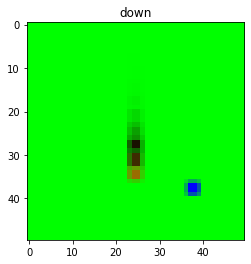

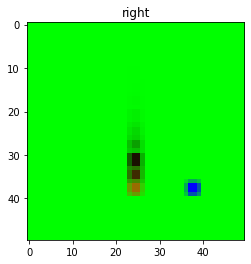

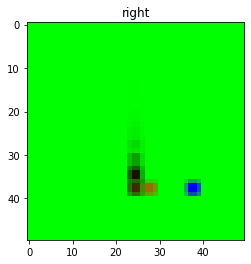

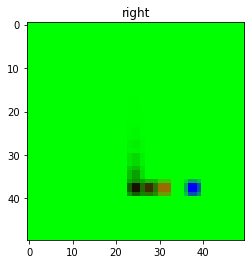

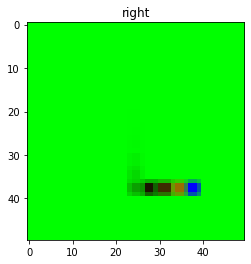

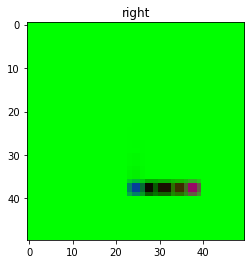

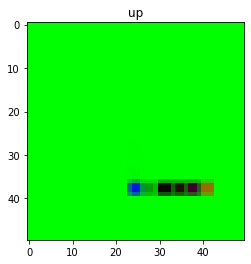

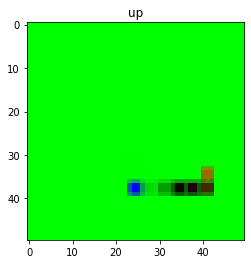

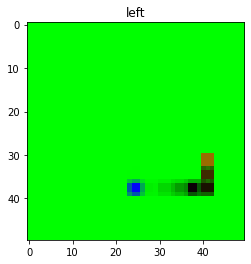

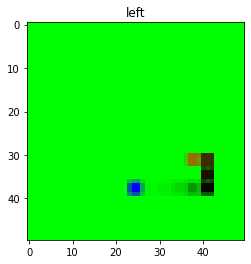

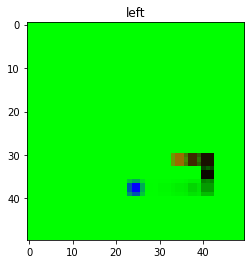

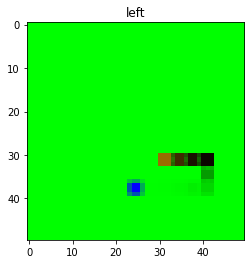

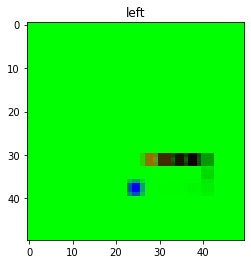

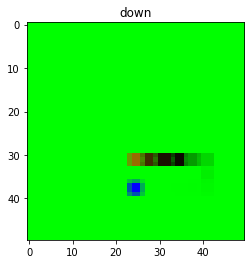

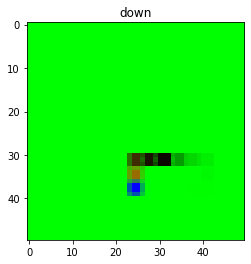

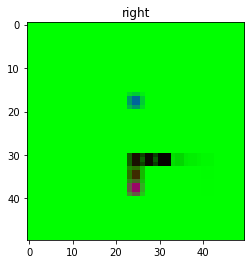

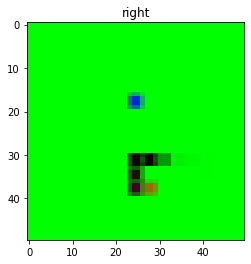

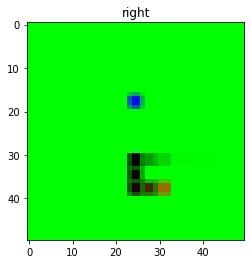

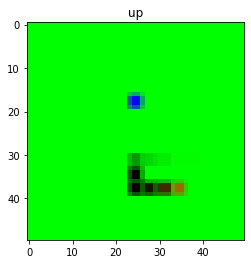

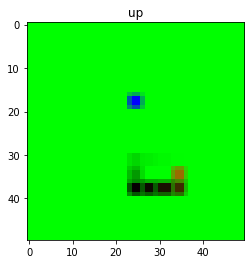

In [13]:
i = iter(dataset)

action_arg_dict = {
  3: 'left',
  1: 'right',
  2: 'down',
  0: 'up'
}
def plot(data):
  (observation, action) = data
  plt.imshow(observation)
  plt.title(action_arg_dict[np.argmax(action)])
  plt.show()

for _ in range(6):
  next(i)

for _ in range(20):
  plot(next(i))


In [14]:
dataset = dataset.shuffle(buffer_size=1_000)

# The prcatange of validate data is 1 / every_n_th_validate
every_n_th_validate = 5

train_d = dataset.enumerate() \
  .filter(lambda i, data: i % every_n_th_validate != 0) \
  .map(lambda i, data: data)

validate_d = dataset.enumerate() \
  .filter(lambda i, data: i % every_n_th_validate == 0) \
  .map(lambda i, data: data)

def batch_data(dataset):
  return dataset.batch(16)

train_d = batch_data(train_d)
validate_d = batch_data(validate_d)

In [15]:
from brain.v3.brain import Brain
b = Brain(learning_rate=0.0001)
b.build_and_compile_model(metrics=['accuracy'])
b.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 11, 11, 32)        6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0     

In [16]:
h = b.model.fit(train_d, validation_data=validate_d, epochs=20)

Epoch 1/20
263/263 [==============================] - 1s 4ms/step - loss: 0.1844 - accuracy: 0.3229 - val_loss: 0.1750 - val_accuracy: 0.3829
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1662 - accuracy: 0.4519 - val_loss: 0.1581 - val_accuracy: 0.5219
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.5898 - val_loss: 0.1361 - val_accuracy: 0.6371
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1274 - accuracy: 0.6767 - val_loss: 0.1176 - val_accuracy: 0.7019
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1144 - accuracy: 0.7074 - val_loss: 0.1080 - val_accuracy: 0.7105
Epoch 6/20
263/263 [==============================] - 1s 3ms/step - loss: 0.1077 - accuracy: 0.7279 - val_loss: 0.1004 - val_accuracy: 0.7400
Epoch 7/20
263/263 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.7486 - val_loss: 0.0938 - val_accuracy: 0.7590
Epoch 

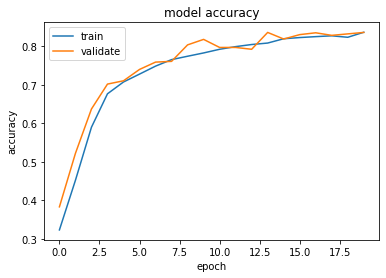

In [18]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig(f"{b.current_folder}/{name}/pre-training_accuracy.jpg")
plt.show()

In [19]:
b.save_model(name=name)

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/v3/pre-trained-more/model/assets


2022-04-16 11:43:16.075552: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
